In [ ]:
!unzip /content/F.zip
!unzip /content/N.zip
!unzip /content/O.zip
!unzip /content/S.zip
!unzip /content/Z.zip


Archive:  /content/F.zip
  inflating: F100.txt                
  inflating: F002.txt                
  inflating: F003.txt                
  inflating: F004.txt                
  inflating: F005.txt                
  inflating: F006.txt                
  inflating: F007.txt                
  inflating: F008.txt                
  inflating: F009.txt                
  inflating: F010.txt                
  inflating: F011.txt                
  inflating: F012.txt                
  inflating: F013.txt                
  inflating: F014.txt                
  inflating: F015.txt                
  inflating: F016.txt                
  inflating: F017.txt                
  inflating: F018.txt                
  inflating: F019.txt                
  inflating: F020.txt                
  inflating: F021.txt                
  inflating: F022.txt                
  inflating: F023.txt                
  inflating: F024.txt                
  inflating: F025.txt                
  inflating: F026.txt    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import librosa

In [ ]:
#S -> E

In [ ]:
df = []
label = []
count =0
zeros = 0
for path in glob.glob('/content/*'):
  
  if path.endswith('.txt') or path.endswith('.TXT'):
    data = pd.read_csv(path,header=None)
    data = np.array(data)

    df.append(data)

    if path.split('/')[2][0] == 'S':
      label.append(1)
    else:
      label.append(0)
      zeros += 1
    
    count += 1


    

In [ ]:
df = np.array(df)
label = np.array(label)

In [ ]:
print(count)
print(zeros)
print(count-zeros)

500
400
100


In [ ]:
df = df/1.0

In [ ]:
df= df.reshape((-1,4097))
df.shape

(500, 4097)

In [ ]:
df[0]

array([ 14.,   3., -14., ..., -68., -61., -27.])

In [ ]:
data2[0]

array([0.48296033, 0.48016277, 0.47583927, ..., 0.4621058 , 0.46388606,
       0.47253306])

In [ ]:
x_mels_2 = []
for i in range(df.shape[0]):
  if (i+1)%100 == 0:
    print(i+1)
  curr = data2[i]
  stft = librosa.stft(curr, n_fft=n_fft, hop_length=hop_length)
  stft = np.abs(stft)
  stft = stft.reshape((-1))
  melSpec = librosa.feature.melspectrogram(y=stft, sr=22500, n_mels=256)
  melSpec_dB = librosa.power_to_db(melSpec, ref=np.max)
  x_mels_2.append(np.array(melSpec_dB))

100
200
300
400
500


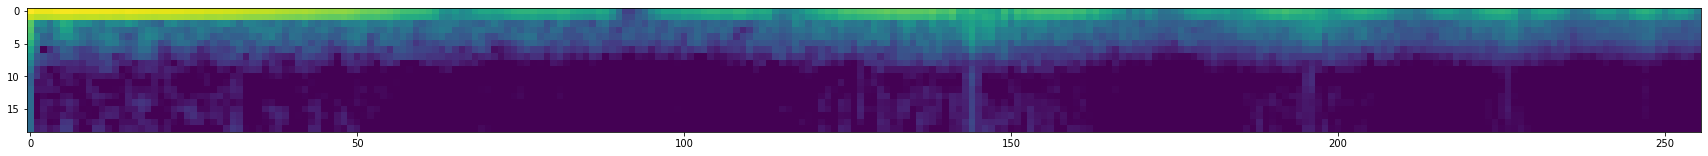

In [ ]:
plt.figure(figsize=(30,5))
plt.imshow(x_mels_2[16].T)

In [ ]:
x_mels_2 = np.array(x_mels_2)

In [ ]:
x_mels_2.shape

(500, 64, 19)

In [ ]:
x_mels_2 = x_mels_2.reshape((-1,x_mels_2.shape[1]*x_mels_2.shape[2]))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_mels_2,label,test_size=0.3,random_state=7)

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.score(x_test,y_test)

0.96

In [ ]:
preds=clf.predict(x_test)

In [ ]:
np.sum(preds != y_test)

6

In [ ]:
count=0
for i in range(y_test.shape[0]):
  if preds[i] !=  y_test[i]:
    print(i)
    count += 1

5
28
34
59
76
110


In [ ]:
count

6

In [ ]:
(preds.shape[0] - count) / preds.shape[0]

0.96

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, preds, target_names=target_names))
 

              precision    recall  f1-score   support

     class 0       0.96      0.99      0.98       125
     class 1       0.95      0.80      0.87        25

    accuracy                           0.96       150
   macro avg       0.96      0.90      0.92       150
weighted avg       0.96      0.96      0.96       150



In [ ]:
preds

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
label

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,

In [ ]:
label[0]

0

In [ ]:
label[3]

1

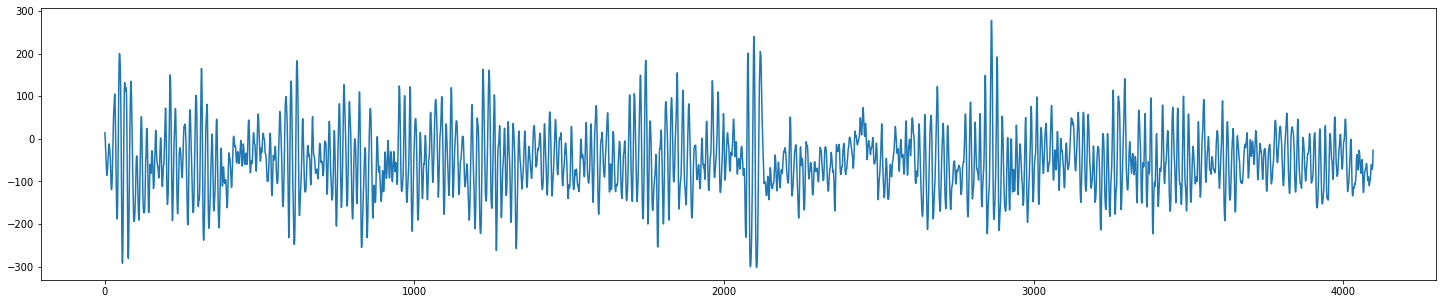

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(df[0])
plt.savefig('/content/1.pdf')

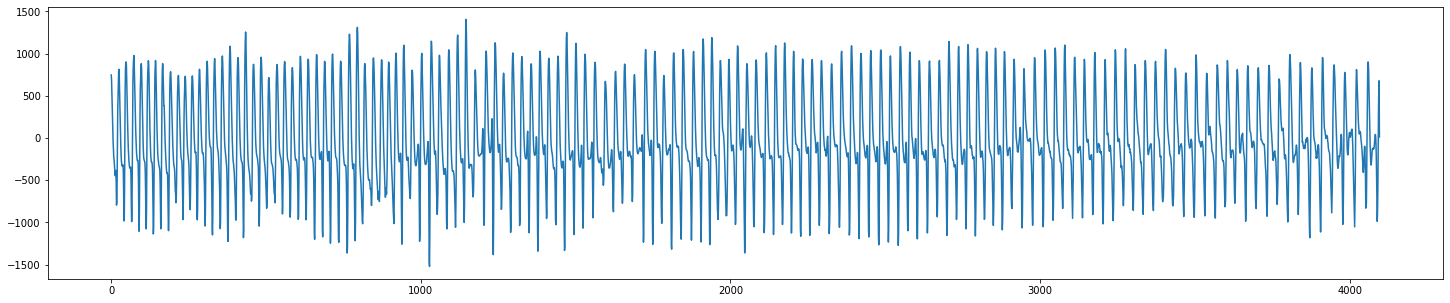

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(df[12])
plt.savefig('/content/2.pdf')

In [ ]:
diff_seizures = []
diff_no_sei = []
for i in range(df.shape[0]):
  min = 2000
  max = -2000

  for vals in df[i]:
    if vals > max :
      max = vals
    if vals < min :
      min = vals

  if label[i] == 1:
    diff_seizures.append(np.abs(min) + np.abs(max))
  else :
    diff_no_sei.append(np.abs(min) + np.abs(max))




In [ ]:
diff_seizures = np.array(diff_seizures)
diff_no_sei = np.array(diff_no_sei)

In [ ]:
diff_seizures.shape

(100,)

In [ ]:
diff_no_sei.shape

(400,)

In [ ]:
print("Stats of non seizure EEG :")
print("max : " + str(diff_no_sei.max()))
print("min : " + str(diff_no_sei.min()))
print("mean : " + str(diff_no_sei.mean()))
print("Standard deviation : " + str(diff_no_sei.std()))


Stats of non seizure EEG :
max : 2616.0
min : 126.0
mean : 400.5625
Standard deviation : 232.8047488642575


In [ ]:
print("Stats of seizure EEG :")
print("max : " + str(diff_seizures.max()))
print("min : " + str(diff_seizures.min()))
print("mean : " + str(diff_seizures.mean()))
print("Standard deviation : " + str(diff_seizures.std()))

Stats of seizure EEG :
max : 3696.0
min : 492.0
mean : 1858.96
Standard deviation : 864.0023717560039


In [ ]:
count_sei = 0
for i in range(df.shape[0]):
  min = df[i].min()
  max = df[i].max()
  val = np.abs(min) + np.abs(max)

  if np.abs(diff_seizures.mean() - val) < np.abs(diff_no_sei.mean() - val):
    count_sei += 1
  

In [ ]:
count_sei

79

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf.score(x_test,y_test)

0.9066666666666666

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(criterion='entropy',n_estimators=500)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf.score(x_test,y_test)

0.9933333333333333

In [ ]:
min = df.min()
max = df.max()

In [ ]:
min

-1885.0

In [ ]:
max

2047.0

In [ ]:
data2 = []
for i in range(df.shape[0]):
  
  n = (df[i] - min) / (max - min)
  data2.append(n)

In [ ]:
data2 = np.array(data2)

In [ ]:
data2.shape

(500, 4097)

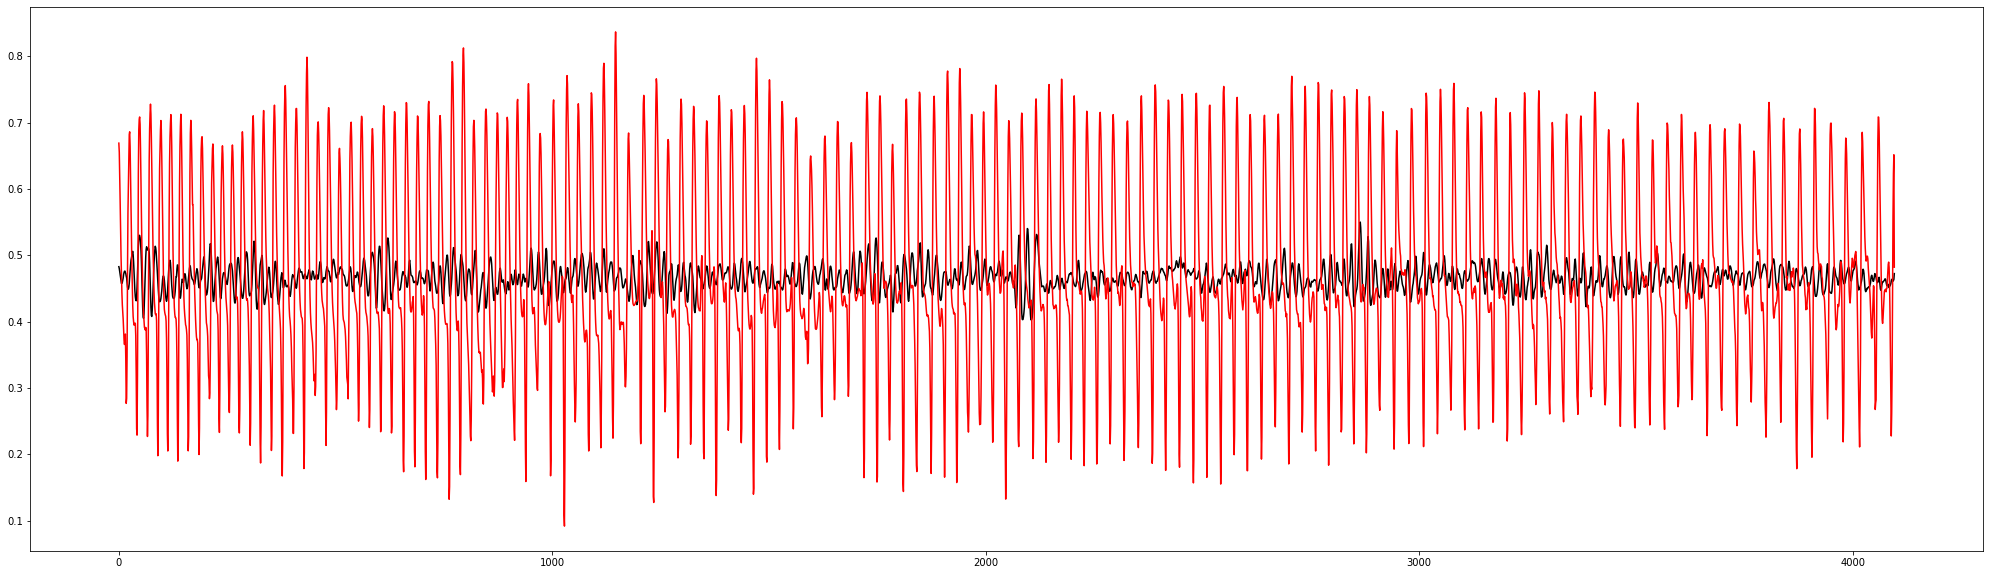

In [ ]:
plt.figure(figsize=(35,10))
plt.plot(data2[0],color='black')
plt.plot(data2[12],color ='red')
plt.savefig('/content/3.pdf')